In [26]:
import pandas as pd
import numpy as np

df = pd.read_csv(r"Open Power Systems Data.csv") # Load the CSV file
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d') # Convert the Date column to datetime format
df.set_index('Date', inplace=True) # Set the Date column as the index of the DataFrame.
df

,Consumption
Date,
2021-01-01,53.528105
2021-01-02,51.939873
2021-01-03,54.191159
2021-01-04,57.720713
2021-01-05,57.850840
...,...
2021-04-26,58.774786
2021-04-27,59.778780
2021-04-28,58.451054


In [27]:
df.head() # Display the first few rows of the DataFrame

,Consumption
Date,
2021-01-01,53.528105
2021-01-02,51.939873
2021-01-03,54.191159
2021-01-04,57.720713
2021-01-05,57.850840


In [28]:
df.tail() # Display the last few rows of the DataFrame

,Consumption
Date,
2021-04-26,58.774786
2021-04-27,59.778780
2021-04-28,58.451054
2021-04-29,60.994476
2021-04-30,62.704855


In [ ]:
df.info() # Display information about the DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2021-01-01 to 2021-04-30
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  120 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [ ]:
df.describe() # Display summary statistics of the DataFrame

,Consumption
count,120.000000
mean,56.215223
std,4.979767
min,42.563893
25%,53.356334
50%,55.947536
75%,59.983650
max,68.244350


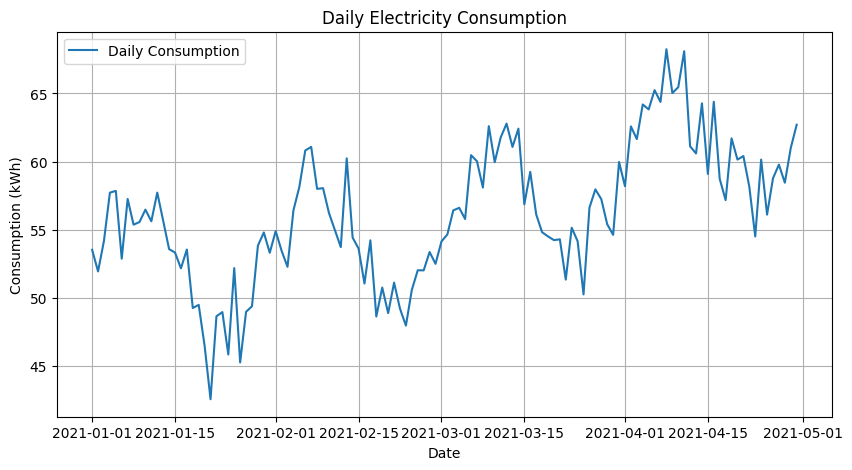

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a simple line graph of daily electricity consumption.
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Consumption'], label='Daily Consumption')
plt.title('Daily Electricity Consumption')
plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.legend()
plt.grid()
plt.show() # Show the plot